In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('expand_frame_repr',False)
pd.set_option('display.max_columns',None)
plt.rcParams["font.family"] = 'SimHei'

In [63]:
lc=pd.read_csv(r'C:\python\学习\用户画像分析\LC.csv')
print(lc.shape)

(328553, 21)


数据预处理

In [64]:
lc.info()
print('-'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

In [65]:
# 处理重复值
print(lc.isnull().any().sum())

0


In [66]:
# 处理异常值
lc['ListingId'] = lc['ListingId'].astype(str)
lc['借款成功日期']=pd.to_datetime(lc['借款成功日期'])
# 查看布尔值中是否存在异常
print(lc['手机认证'].unique())
print(lc['户口认证'].unique())
print(lc['视频认证'].unique())
print(lc['学历认证'].unique())
print(lc['淘宝认证'].unique())
print(lc['征信认证'].unique())
# 查看年龄是否存在异常
print(lc['年龄'].min(),lc['年龄'].max())

['成功认证' '未成功认证']
['未成功认证' '成功认证']
['成功认证' '未成功认证']
['未成功认证' '成功认证']
['未成功认证' '成功认证']
['未成功认证' '成功认证']
17 56


In [67]:
# 处理重复值
lc.drop_duplicates(inplace=True)
print(lc.shape)
# 比对前后数据规模，发现没有重复值

(328553, 21)


# 从借款方面分析
1.从年龄、性别各个年龄段的男女比例分析

In [68]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


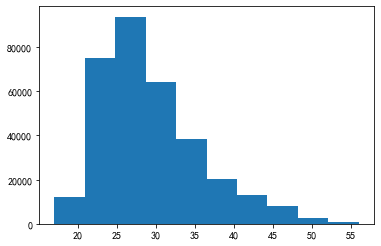

In [69]:
plt.hist(lc['年龄'])
plt.show()
# 由直方图可以看出年龄主要集中在20-40之间

In [70]:
# 年龄分布在17-56之间，进行分箱，15-20，20-25，25-30，30-35，35-40，40+
bins=[15,20,25,30,35,40,60]
labels=['[15-20)','[20-25)','[25-30)','[30-35)','[35-40)','[40-60)']
lc['年龄']=pd.cut(lc['年龄'],bins=bins,labels=labels,right=False) # 右侧为开区间,不包括60
lc.head(5)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [71]:
# 用数据透视表的形式直观展示不同年龄段借款金额的总值
groupby_age=pd.pivot_table(lc,index='年龄',values='借款金额',aggfunc=np.sum)
total_mon=groupby_age.values.sum()
groupby_age['percent']=round(groupby_age['借款金额']/total_mon*100,2)
print(groupby_age)
print('total_mon',total_mon)

              借款金额  percent
年龄                         
[15-20)    7327700     0.50
[20-25)  258179184    17.76
[25-30)  504336528    34.70
[30-35)  346981067    23.87
[35-40)  176280861    12.13
[40-60)  160352976    11.03
total_mon 1453458316


In [72]:
# 按性别分组求男、女借款总额
groupby_sex=lc.groupby(['性别'])['借款金额'].sum()
print(groupby_sex)

性别
女     452128926
男    1001329390
Name: 借款金额, dtype: int64


In [73]:
# 求不同年龄段性别的分布
age_sex=pd.pivot_table(lc,index='年龄',columns='性别',values='借款金额',aggfunc='count')
age_sex['总人数']=age_sex.sum(axis=1)
print(age_sex)

性别           女      男     总人数
年龄                           
[15-20)   1939   2856    4795
[20-25)  28174  54252   82426
[25-30)  36466  77134  113600
[30-35)  21391  45429   66820
[35-40)  10206  21995   32201
[40-60)   8431  20280   28711


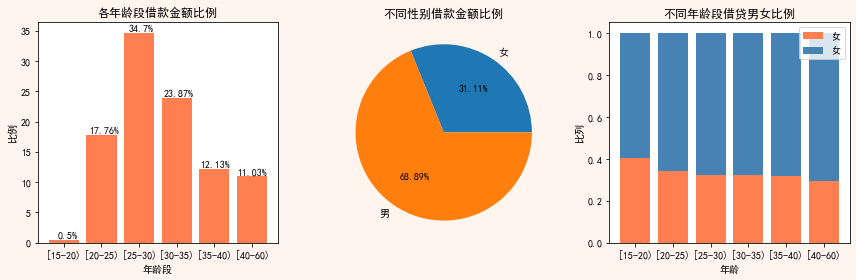

In [74]:
# 将上述结果可视化
plt.figure(figsize=(12,4), facecolor='seashell')
plt.subplot(131)
plt.bar(x=groupby_age.index,height=groupby_age['percent'],color='coral')
plt.xlabel('年龄段')
plt.ylabel('比例')
plt.title('各年龄段借款金额比例')
# 添加数据标记
for (a, b) in zip(np.linspace(0.1,5,6), groupby_age['percent']):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')
plt.subplot(132)
plt.pie(groupby_sex,labels=groupby_sex.index,autopct='%.2f%%')
plt.title('不同性别借款金额比例')
plt.subplot(133)
plt.bar(x=age_sex.index,height=age_sex['女']/age_sex['总人数'],label='女',color='coral')
plt.bar(x=age_sex.index,height=age_sex['男']/age_sex['总人数'],bottom=age_sex['女']/age_sex['总人数'],label='女',color='steelblue')
plt.legend(loc='best')
plt.title('不同年龄段借贷男女比例')
plt.xlabel('年龄')
plt.ylabel('比列')
plt.tight_layout()

## 由上述结果表明
1.20-35岁的男性是拍拍贷平台借款的主力消费人群；

2.20-35岁的人群约占总消费人群的百分之76；

3.借贷人群的男女比列约为7比3，男性为大头；

4.从各个年龄段来看男性借贷占比都在60%到70%之间，并且随着年龄的增长，男性比列逐步上升 

2.从初始评级和借款类型进行分析

In [75]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [76]:
# 不同初始评级借款金额汇总
groupby_rank=pd.pivot_table(lc,index='初始评级',values='借款金额',aggfunc=np.sum)
groupby_rank

,借款金额
初始评级,
A,60558320
B,250018081
C,545090255
D,529474332
E,63729949
F,4587379


In [77]:
# 不同借款类型借款金额汇总
groupby_type=pd.pivot_table(lc,index='借款类型',values='借款金额',aggfunc=np.sum)
groupby_type

,借款金额
借款类型,
APP闪电,309852852
其他,400808282
普通,619468392
电商,123328790


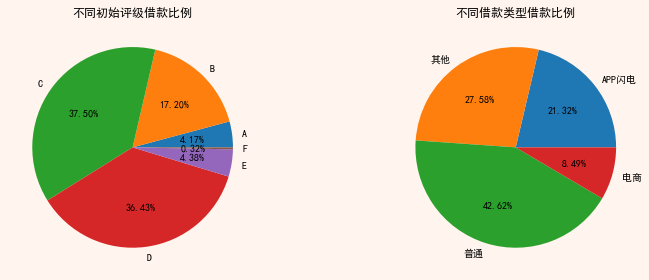

In [78]:
# 可视化
plt.figure(figsize=(12,4),facecolor='seashell')
plt.subplot(121)
plt.pie(groupby_rank,autopct='%.2f%%',labels=groupby_rank.index)
plt.title('不同初始评级借款比例')
plt.subplot(122)
plt.pie(groupby_type,autopct='%.2f%%',labels=groupby_type.index)
plt.title('不同借款类型借款比例')
plt.tight_layout()

## 由上述结果表明
1.中等信誉等级占借款金额比例的大头，其中等级B、C、D做出约百分之91的贡献，等级A、B做出约百分之21的贡献，等级C、D做出约百分之74的贡献，等级E、F做出约百分之5的贡献;

2.普通借款类型占借款金额比例的大头，与拍拍贷合作的APP闪电也占比百分之21，有着不错的效果，该APP可进一步加大合作。 

3.从是否首标对新老用户进行分析

In [79]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


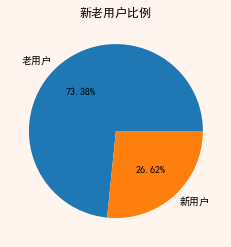

In [80]:
groupby_new_old=lc['是否首标'].value_counts()
groupby_new_old=groupby_new_old.rename({'否':'老用户','是':'新用户'})
plt.figure(figsize=(12,4),facecolor='seashell')
plt.pie(groupby_new_old.values,labels=groupby_new_old.index,autopct='%.2f%%')
plt.title('新老用户比例')
plt.show()

## 由上述结果表明
1.在借款人群中，老用户占比高达百分之73，说明平台的用户粘性还是不错的 

4.从历史成功借款次数出发进行分析

In [81]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [82]:
# 计算平台人均借款次数
avg_loan=lc['历史成功借款次数'].sum()/lc['ListingId'].count()
print(f'平台人均借款次数为:{round(avg_loan,2)}次')
# 计算老用户借款总次数和人均借款次数
groupby_new_old_loan=pd.pivot_table(lc,index='是否首标',values='历史成功借款次数',aggfunc=np.sum)
groupby_new_old_loan['人均借款次数']=groupby_new_old_loan['历史成功借款次数']/lc['是否首标'].value_counts().sort_index().values
print(f"老用户借款总数:{groupby_new_old_loan.loc['否','历史成功借款次数']}\n老用户人均借款次数:{round(groupby_new_old_loan.loc['否','人均借款次数'],2)}")
# 计算不同年龄段借款总次数和人均借款次数
groupby_age_loan=pd.pivot_table(lc,index='年龄',values='历史成功借款次数',aggfunc=np.sum)
groupby_age_loan['人均借款次数']=groupby_age_loan['历史成功借款次数']/lc['年龄'].value_counts().sort_index().values
print(groupby_age_loan)
# 计算不同性别借款总次数和人均借款次数
groupby_sex_loan=pd.pivot_table(lc,index='性别',values='历史成功借款次数',aggfunc=np.sum)
groupby_sex_loan['人均借款次数']=groupby_sex_loan['历史成功借款次数']/lc['性别'].value_counts().sort_index().values
print(groupby_sex_loan)
# 计算不同初始评级借款总次数和人均借款次数
groupby_rank_loan=pd.pivot_table(lc,index='初始评级',values='历史成功借款次数',aggfunc=np.sum)
groupby_rank_loan['人均借款次数']=groupby_rank_loan['历史成功借款次数']/lc['初始评级'].value_counts().sort_index().values
print(groupby_rank_loan)
# 计算不同借款类型借款总次数和人均借款次数
groupby_type_loan=pd.pivot_table(lc,index='借款类型',values='历史成功借款次数',aggfunc=np.sum)
groupby_type_loan['人均借款次数']=groupby_type_loan['历史成功借款次数']/lc['借款类型'].value_counts().sort_index().values
print(groupby_type_loan)

平台人均借款次数为:2.32次
老用户借款总数:763281
老用户人均借款次数:3.17
         历史成功借款次数    人均借款次数
年龄                         
[15-20)      6275  1.308655
[20-25)    165445  2.007194
[25-30)    282342  2.485405
[30-35)    167196  2.502185
[35-40)     78494  2.437626
[40-60)     63529  2.212706
    历史成功借款次数    人均借款次数
性别                    
女     238517  2.237348
男     524764  2.364377
      历史成功借款次数    人均借款次数
初始评级                    
A        35213  3.424057
B        93552  2.818850
C       390339  2.963737
D       225454  1.671763
E        16199  0.951371
F         2524  1.695097
       历史成功借款次数    人均借款次数
借款类型                     
APP闪电    242708  2.165508
其他       298229  3.064983
普通       219556  1.859021
电商         2788  2.608045


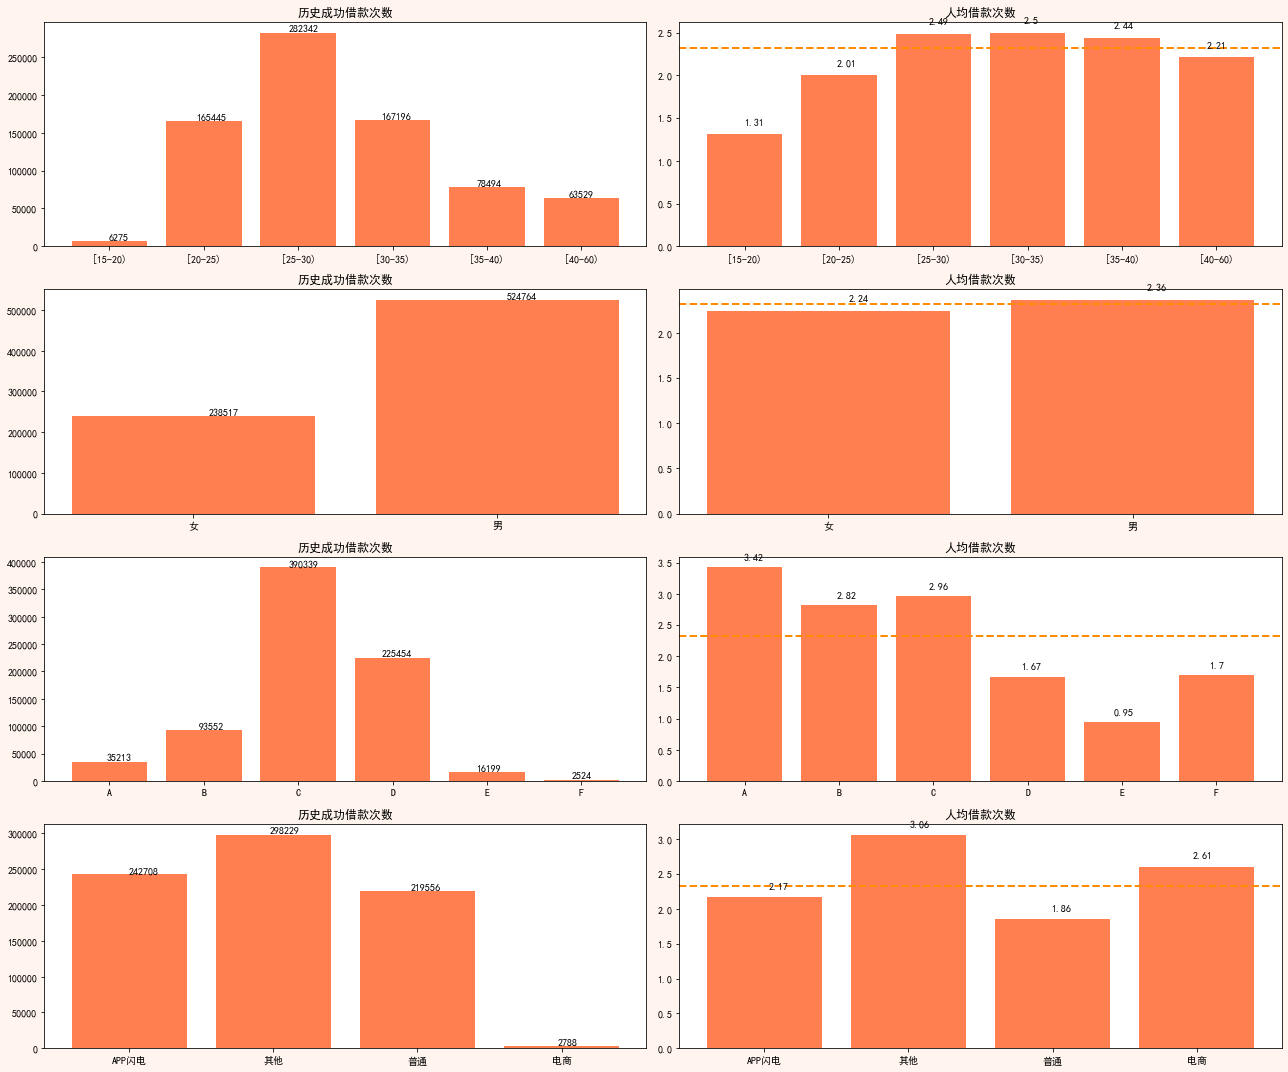

In [83]:
# 可视化
plt.figure(figsize=(18,15),facecolor='seashell')
plt.subplot(421)
plt.bar(groupby_age_loan.index,groupby_age_loan['历史成功借款次数'],color='coral')
plt.title('历史成功借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_age_loan['历史成功借款次数']):
    plt.text(a, b+0.1, str(b), ha='center', va='bottom')
plt.subplot(422)
plt.bar(groupby_age_loan.index,groupby_age_loan['人均借款次数'],color='coral')
plt.axhline(y=avg_loan, c='darkorange', ls='--', lw=2,label='均线')
plt.title('人均借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_age_loan['人均借款次数']):
    plt.text(a, b+0.1, round(b,2), ha='center', va='bottom')
plt.subplot(423)
plt.bar(groupby_sex_loan.index,groupby_sex_loan['历史成功借款次数'],color='coral')
plt.title('历史成功借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_sex_loan['历史成功借款次数']):
    plt.text(a, b+0.1, str(b), ha='center', va='bottom')
plt.subplot(424)
plt.bar(groupby_sex_loan.index,groupby_sex_loan['人均借款次数'],color='coral')
plt.axhline(y=avg_loan, c='darkorange', ls='--', lw=2,label='均线')
plt.title('人均借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_sex_loan['人均借款次数']):
    plt.text(a, b+0.1, round(b,2), ha='center', va='bottom')
plt.subplot(425)
plt.bar(groupby_rank_loan.index,groupby_rank_loan['历史成功借款次数'],color='coral')
plt.title('历史成功借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_rank_loan['历史成功借款次数']):
    plt.text(a, b+0.1, str(b), ha='center', va='bottom')
plt.subplot(426)
plt.bar(groupby_rank_loan.index,groupby_rank_loan['人均借款次数'],color='coral')
plt.axhline(y=avg_loan, c='darkorange', ls='--', lw=2,label='均线')
plt.title('人均借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_rank_loan['人均借款次数']):
    plt.text(a, b+0.1, round(b,2), ha='center', va='bottom')
plt.subplot(427)
plt.bar(groupby_type_loan.index,groupby_type_loan['历史成功借款次数'],color='coral')
plt.title('历史成功借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_type_loan['历史成功借款次数']):
    plt.text(a, b+0.1, str(b), ha='center', va='bottom')
plt.subplot(428)
plt.bar(groupby_type_loan.index,groupby_type_loan['人均借款次数'],color='coral')
plt.axhline(y=avg_loan, c='darkorange', ls='--', lw=2,label='均线')
plt.title('人均借款次数')
for (a, b) in zip(np.linspace(0.1,5,6), groupby_type_loan['人均借款次数']):
    plt.text(a, b+0.1, round(b,2), ha='center', va='bottom')
plt.tight_layout()

## 由上述结果表明
1 .平台人均借款次数为:2.32次，老用户人均借款次数:3.17，老用户的粘性还是不错的；

2.不同年龄段中，20-40岁的人群人均借款次数超过了平台人均借款次数，为主力军，跟前面预测一致；

3.不同性别中，男性人均借款次数超过平台人均借款次数，为主力军，跟前面预测一致；

4.不同初始评级中，等级A、B人借款总数较低，但人均借款次数较高，超过平台人均借款次数；

5.不同借款类型中，电商借款总数很低，但人均借款次数超过平台人均借款次数，可以进一步挖掘。 

# 分析用户借贷特征

In [84]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


1.从借款金额入手分析

In [85]:
print(f"最小借款金额:{min(lc['借款金额'])}\n最大借款金额:{max(lc['借款金额'])}")
# 平台借款金额分布
group_loan=pd.qcut(lc['借款金额'],20).value_counts().sort_index()
# 20-35岁人群借款金额分布
group_year=lc.loc[(lc['年龄'].values=='[20-25)')|(lc['年龄'].values=='[25-30)')|(lc['年龄'].values=='[30-35)')]
group_year_loan=pd.qcut(group_year['借款金额'],20).value_counts().sort_index()
# 20-35岁男性借款金额分布
group_year_sex=group_year.loc[lc['性别']=='男']
group_year_sex_loan=pd.qcut(group_year_sex['借款金额'],20).value_counts().sort_index()
# 评级为C、D人群借款金额分布
group_rank=lc.loc[(lc['初始评级'].values=='C')|(lc['初始评级'].values=='D')]
group_rank_loan=pd.qcut(group_rank['借款金额'],20).value_counts().sort_index()

最小借款金额:100
最大借款金额:500000


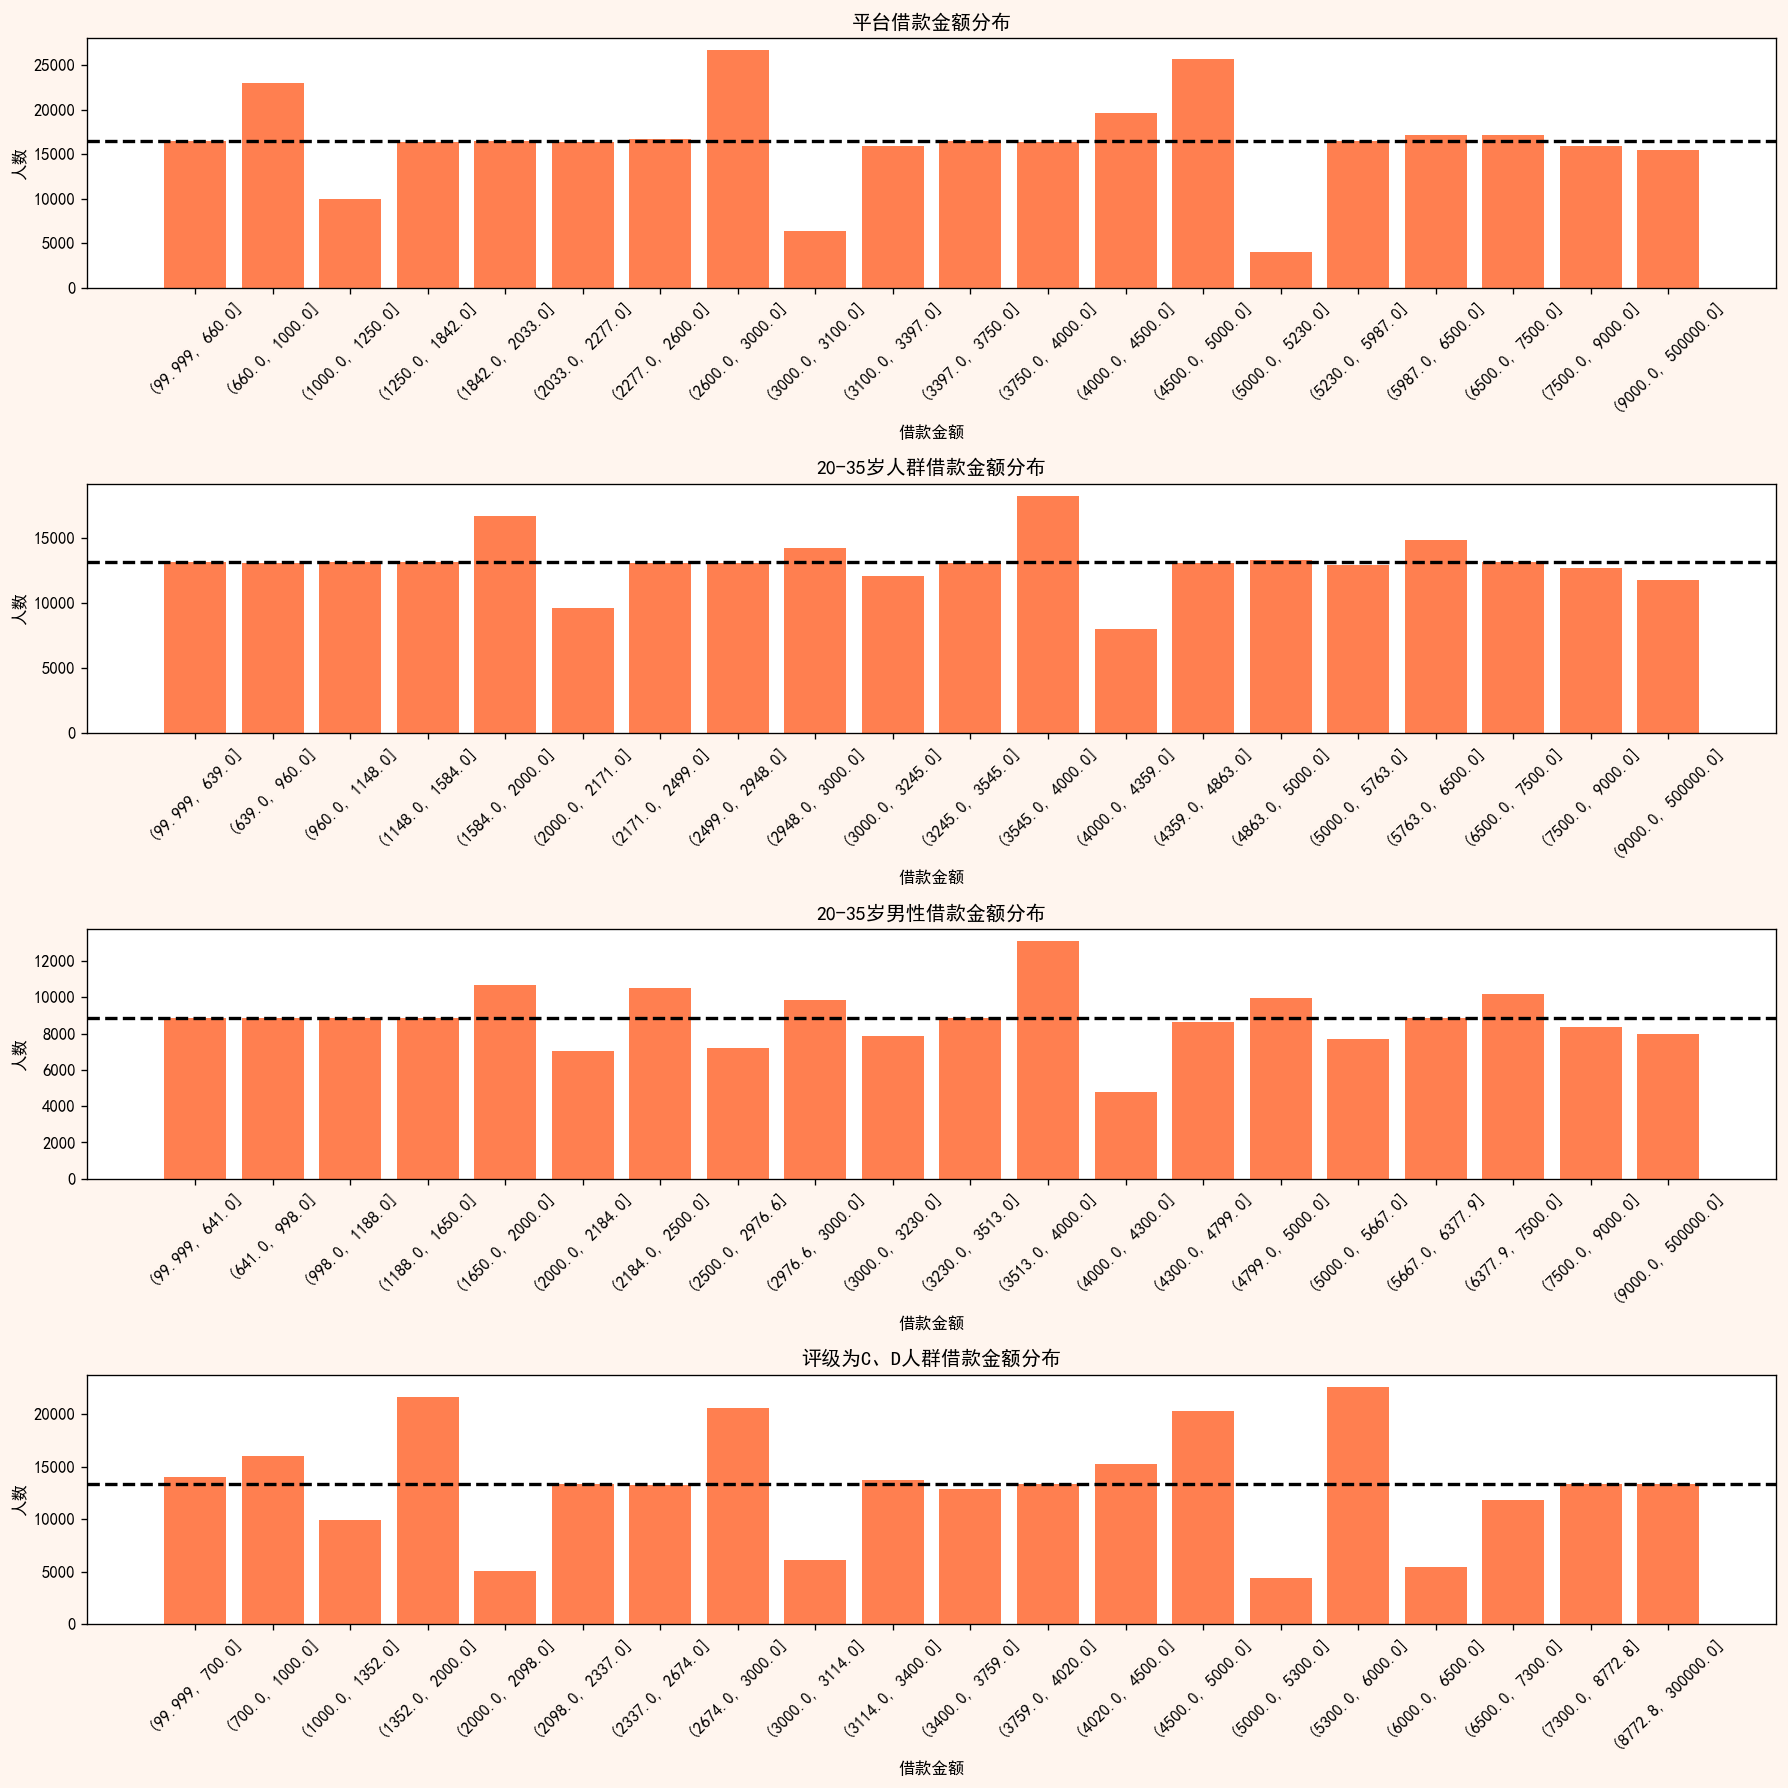

In [86]:
# 可视化
plt.figure(figsize=(15,15),facecolor='seashell',dpi=120)
plt.subplot(411)
plt.bar([str(i) for i in group_loan.index],group_loan.values,color='coral')
plt.axhline(y=group_loan.values.mean(), c='black', ls='--', lw=2,label='均线') 
plt.xticks(rotation=45) 
plt.xlabel('借款金额')
plt.ylabel('人数')
plt.title('平台借款金额分布')
plt.subplot(412)
plt.bar([str(i) for i in group_year_loan.index],group_year_loan.values,color='coral')
plt.axhline(y=group_year_loan.values.mean(), c='black', ls='--', lw=2,label='均线') 
plt.xticks(rotation=45) 
plt.xlabel('借款金额')
plt.ylabel('人数')
plt.title('20-35岁人群借款金额分布')
plt.subplot(413)
plt.bar([str(i) for i in group_year_sex_loan.index],group_year_sex_loan.values,color='coral')
plt.axhline(y=group_year_sex_loan.values.mean(), c='black', ls='--', lw=2,label='均线') 
plt.xticks(rotation=45) 
plt.xlabel('借款金额')
plt.ylabel('人数')
plt.title('20-35岁男性借款金额分布')
plt.subplot(414)
plt.bar([str(i) for i in group_rank_loan.index],group_rank_loan.values,color='coral')
plt.axhline(y=group_rank_loan.values.mean(), c='black', ls='--', lw=2,label='均线') 
plt.xticks(rotation=45) 
plt.xlabel('借款金额')
plt.ylabel('人数')
plt.title('评级为C、D人群借款金额分布')
plt.tight_layout()

## 有上述结果表明
1.单笔借款金额最多的是2600——3000，其次是4500——5000；

2.从之前的结论中得出20-35岁是主力消费人群，这个人群中单笔借款金额最多的是3545——4000，说明青年人更偏向高消费；

3.对于20-35岁人群中占大多数的男性这个人群，单笔借款金额最多的是3513——4000，与20-35岁人群相差不多.

2.从借款期限分析

In [87]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [88]:
# 借款期限分布
print(f"借款期限有:{[i for i in lc['借款期限'].unique()]}")
print(f"最大借款期限:{max(lc['借款期限'])},最小借款期限:{min(lc['借款期限'])}")

借款期限有:[12, 24, 6, 10, 3, 7, 1, 9, 8, 11, 5, 18, 4, 20, 17, 2, 15, 21]
最大借款期限:24,最小借款期限:1


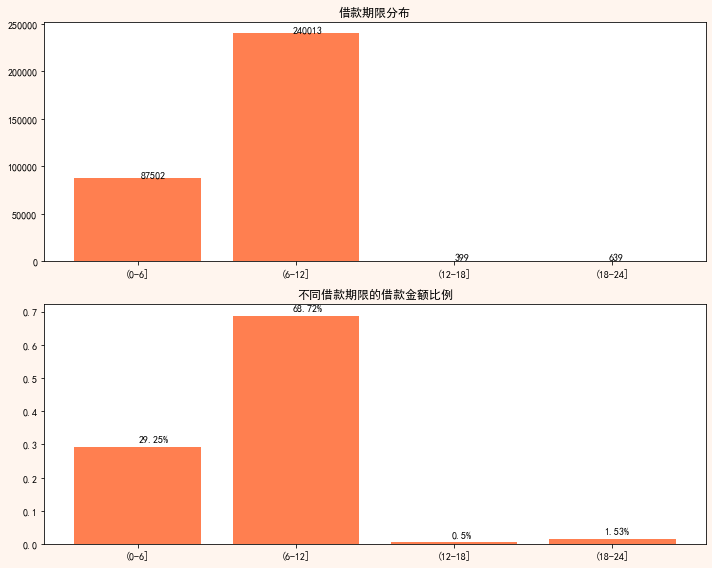

In [89]:
# 对借款期限分组
bins=[i for i in range(0,25,6)]
lc['借款期限']=pd.cut(lc['借款期限'],bins=bins,labels=(['(0-6]','(6-12]','(12-18]','(18-24]']),right=True)
group_period=lc['借款期限'].value_counts().sort_index()
period_amount=pd.pivot_table(lc,index='借款期限',values='借款金额',aggfunc=np.sum)
period_amount['比例']=round(period_amount['借款金额']/lc['借款金额'].sum(),4)
# 可视化
plt.figure(figsize=(10,8),facecolor='seashell')
plt.subplot(211)
plt.bar([str(i) for i in group_period.index],group_period.values,color='coral')
for (a, b) in zip(np.linspace(0.1,4,5), group_period.values):
    plt.text(a, b+0.1, b, ha='center', va='bottom')
plt.title('借款期限分布')
plt.subplot(212)
plt.bar([str(i) for i in period_amount.index],period_amount['比例'].values,color='coral')
for (a, b) in zip(np.linspace(0.1,4,5), period_amount['比例'].values):
    plt.text(a, b+0.01, str(b*100)+'%', ha='center', va='bottom')
plt.title('不同借款期限的借款金额比例')
plt.tight_layout()

## 由上述结果表明
1.最小借款期限为，最大借款期限为24；

2.百分之99.68的用户选择了不超过12期的借款期限，百分之73的用户选择了6-12的借款期限；

3.用户偏向于12期之内的短期借款，借款金额也集中在12期之内。

3.从借款利率分析

In [90]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,(6-12],18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,(6-12],20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,(18-24],20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,(6-12],18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,(0-6],16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [91]:
# 借款利率分布
print(f"借款利率有:{[i for i in lc['借款利率'].unique()]}")
print(f"全平台借款利率均值:{float(round(lc['借款利率'].mean(),2))}")
group_interest=lc['借款利率'].value_counts().sort_index()

借款利率有:[18.0, 20.0, 16.0, 14.0, 24.0, 22.0, 23.0, 21.0, 19.0, 22.4, 15.0, 17.0, 20.5, 22.2, 12.0, 13.0, 22.24, 22.3, 15.1, 6.5, 10.0, 8.0, 15.8, 14.6, 14.4, 21.4, 10.5, 11.0, 8.5, 9.0, 18.2, 18.3, 22.88, 22.5, 20.2]
全平台借款利率均值:20.6


In [92]:
# 借款期限与借款利率关系
period_interest=pd.pivot_table(lc,index='借款期限',values='借款利率',aggfunc=np.mean)
# 初始评级与借款利率的关系
rank_interest=pd.pivot_table(lc,index='初始评级',values='借款利率',aggfunc=np.mean)
# 借款金额与借款利率的关系
lc_copy=lc.copy()
bins=[i for i in range(0,50001,5000)]
labels=['[0-5000)','[5000-10000)','[10000-15000)','[15000-20000)','[20000-25000)','[25000-30000)','[30000-35000)','[35000-40000)','[40000-45000)','[45000-50000)']
lc_copy['借款金额']=pd.cut(lc_copy['借款金额'],bins=bins,labels=labels)
amount_interest=pd.pivot_table(lc_copy,index='借款金额',values='借款利率',aggfunc=np.mean)
# 借款类型与借款利率的关系
type_interest=pd.pivot_table(lc,index='借款类型',values='借款利率',aggfunc=np.mean)

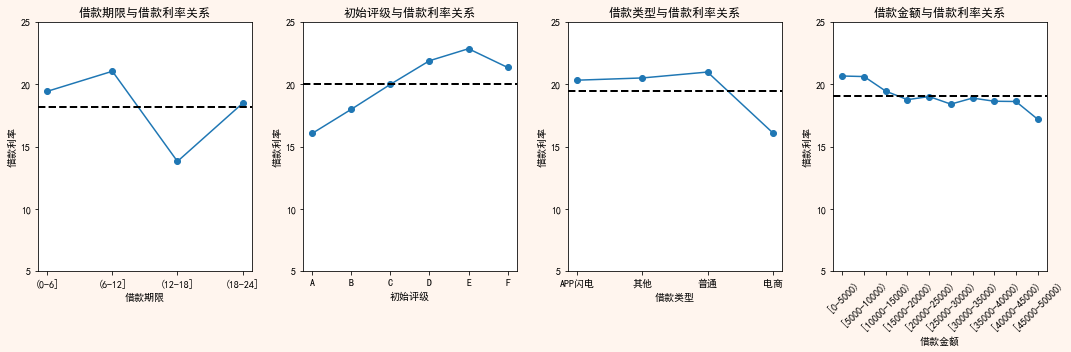

In [93]:
# 可视化
plt.figure(figsize=(15,5),facecolor='seashell')
plt.subplot(141)
plt.plot(period_interest,marker='o')
plt.yticks([5,10,15,20,25])
plt.title('借款期限与借款利率关系')
plt.xlabel('借款期限')
plt.ylabel('借款利率')
plt.axhline(y=period_interest.values.mean(), c='black', ls='--', lw=2,label='均线')

plt.subplot(142)
plt.plot(rank_interest,marker='o')
plt.yticks([5,10,15,20,25])
plt.title('初始评级与借款利率关系')
plt.xlabel('初始评级')
plt.ylabel('借款利率')
plt.axhline(y=rank_interest.values.mean(), c='black', ls='--', lw=2,label='均线')

plt.subplot(143)
plt.plot(type_interest,marker='o')
plt.yticks([5,10,15,20,25])
plt.title('借款类型与借款利率关系')
plt.xlabel('借款类型')
plt.ylabel('借款利率')
plt.axhline(y=type_interest.values.mean(), c='black', ls='--', lw=2,label='均线')

plt.subplot(144)
plt.plot(amount_interest,marker='o')
plt.yticks([5,10,15,20,25])
plt.xticks(rotation=45)
plt.title('借款金额与借款利率关系')
plt.xlabel('借款金额')
plt.ylabel('借款利率')
plt.axhline(y=amount_interest.values.mean(), c='black', ls='--', lw=2,label='均线')
plt.tight_layout()

## 由上述结果表明
1.全平台的借款利率在6.5%-24%区间内，平均借款利率为20.6；

2.借款期限在12-18期区间时，借款利率明显低于其他期限，可能区间样本较少，存在偶然性；

3.随着初始评级的降低，借款利率随之增加，但在F时出现异象，可能该类别样本较少；在借款类型中，显而易见发现
在电商平台上的借款利率要低于其他类型，未来可能会积累更多消费；

4.借款金额和借款利率之间关系较为平稳，基本呈现借款金额越大，借款利息越低。

# 分析逾期还款率

In [94]:
lc.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,(6-12],18.0,2015-05-04,C,其他,否,[35-40),男,成功认证,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,(6-12],20.0,2015-03-16,D,其他,否,[30-35),男,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,(18-24],20.0,2016-04-26,E,普通,否,[40-60),男,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,(6-12],18.0,2015-03-30,C,其他,否,[30-35),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,(0-6],16.0,2015-01-22,C,电商,否,[20-25),男,成功认证,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [95]:
total_unpay=lc['历史逾期还款期数'].sum()/(lc['历史逾期还款期数'].sum()+lc['历史正常还款期数'].sum())
print(f"全平台逾期还款率:{round(total_unpay,4)*100}%")

全平台逾期还款率:4.08%


从多种用户特征出发，分析特征与逾期还款率的关系

In [96]:
# 定义逾期还款率计算函数
def unpay(df):
    unpay=df['历史逾期还款期数']/(df['历史逾期还款期数']+df['历史正常还款期数'])
    return unpay

In [97]:
# 不同年龄与逾期还款率的关系
age_unpay=pd.DataFrame(unpay(lc.groupby('年龄')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a1=round(unpay(lc.groupby('年龄')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
age_unpay['逾期还款率']=[format(i,'.2%') for i in age_unpay['逾期还款率']]
age_unpay

,逾期还款率
年龄,
[15-20),1.12%
[20-25),3.75%
[25-30),4.46%
[30-35),4.03%
[35-40),3.85%
[40-60),3.93%


In [98]:
# 不同性别与逾期还款率的关系
sex_unpay=pd.DataFrame(unpay(lc.groupby('性别')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a2=round(unpay(lc.groupby('性别')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
sex_unpay['逾期还款率']=[format(i,'.2%') for i in sex_unpay['逾期还款率']]
sex_unpay

,逾期还款率
性别,
女,4.82%
男,3.75%


In [99]:
# 不同初始评级与逾期还款率的关系
rank_unpay=pd.DataFrame(unpay(lc.groupby('初始评级')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a3=round(unpay(lc.groupby('初始评级')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
rank_unpay['逾期还款率']=[format(i,'.2%') for i in rank_unpay['逾期还款率']]
rank_unpay

,逾期还款率
初始评级,
A,1.26%
B,1.57%
C,3.67%
D,5.45%
E,12.90%
F,10.66%


In [100]:
# 不同借款类型与逾期还款率的关系
type_unpay=pd.DataFrame(unpay(lc.groupby('借款类型')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a4=round(unpay(lc.groupby('借款类型')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
type_unpay['逾期还款率']=[format(i,'.2%') for i in type_unpay['逾期还款率']]
type_unpay

,逾期还款率
借款类型,
APP闪电,1.48%
其他,4.60%
普通,5.59%
电商,4.68%


In [101]:
# 不同借款金额与逾期还款率的关系
amount_unpay=pd.DataFrame(unpay(lc_copy.groupby('借款金额')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a5=round(unpay(lc_copy.groupby('借款金额')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
amount_unpay['逾期还款率']=[format(i,'.2%') for i in amount_unpay['逾期还款率']]
amount_unpay

,逾期还款率
借款金额,
[0-5000),4.07%
[5000-10000),4.35%
[10000-15000),3.86%
[15000-20000),3.42%
[20000-25000),2.48%
[25000-30000),2.68%
[30000-35000),2.10%
[35000-40000),1.76%
[40000-45000),1.43%


In [102]:
# 不同借款期限与逾期还款率的关系
period_unpay=pd.DataFrame(unpay(lc.groupby('借款期限')[['历史正常还款期数','历史逾期还款期数']].sum()),columns=['逾期还款率'])
a6=round(unpay(lc.groupby('借款期限')[['历史正常还款期数','历史逾期还款期数']].sum())*100,2)
period_unpay['逾期还款率']=[format(i,'.2%') for i in period_unpay['逾期还款率']]
period_unpay

,逾期还款率
借款期限,
(0-6],3.40%
(6-12],4.41%
(12-18],17.86%
(18-24],1.71%


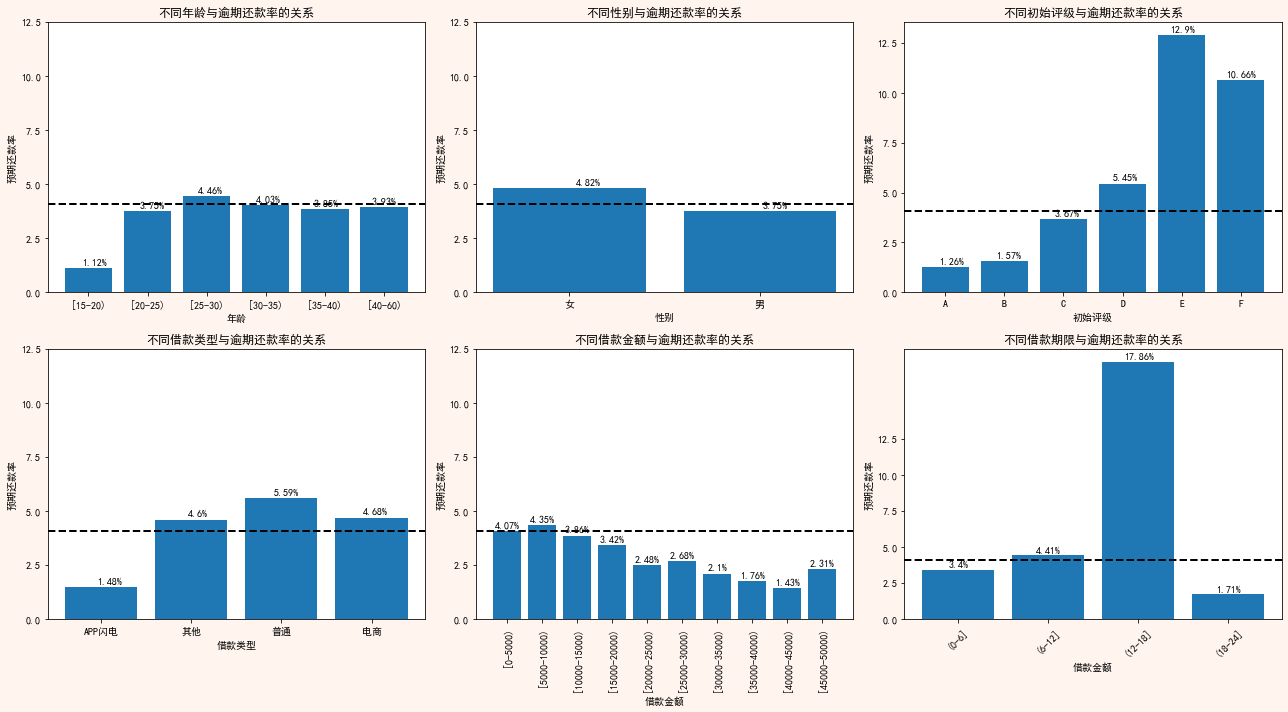

In [103]:
# 可视化
plt.figure(figsize=(18,10),facecolor='seashell')
plt.subplot(231)
plt.bar(x=[str(i) for i in a1.index],height=a1.values)
plt.title('不同年龄与逾期还款率的关系')
plt.xlabel('年龄')
plt.ylabel('预期还款率')
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.1,5,6), a1.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')

plt.subplot(232)
plt.bar(x=[str(i) for i in a2.index],height=a2.values)
plt.title('不同性别与逾期还款率的关系')
plt.xlabel('性别')
plt.ylabel('预期还款率')
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.1,5,6), a2.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')

plt.subplot(233)
plt.bar(x=[str(i) for i in a3.index],height=a3.values)
plt.title('不同初始评级与逾期还款率的关系')
plt.xlabel('初始评级')
plt.ylabel('预期还款率')
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.1,5,6), a3.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')

plt.subplot(234)
plt.bar(x=[str(i) for i in a4.index],height=a4.values)
plt.title('不同借款类型与逾期还款率的关系')
plt.xlabel('借款类型')
plt.ylabel('预期还款率')
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.1,5,6), a4.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')

plt.subplot(235)
plt.bar(x=[str(i) for i in a5.index],height=a5.values)
plt.title('不同借款金额与逾期还款率的关系')
plt.xlabel('借款金额')
plt.ylabel('预期还款率')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.01,9,10), a5.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')

plt.subplot(236)
plt.bar(x=[str(i) for i in a6.index],height=a6.values)
plt.title('不同借款期限与逾期还款率的关系')
plt.xlabel('借款金额')
plt.ylabel('预期还款率')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,15,2.5).tolist())
plt.axhline(y=round(total_unpay,4)*100, c='black', ls='--', lw=2,label='均线')
for (a, b) in zip(np.linspace(0.01,9,10), a6.values):
    plt.text(a, b+0.1, str(b)+'%', ha='center', va='bottom')
plt.tight_layout()

## 由上述结果表明
1.全平台的平均逾期率为4.08%

2.从年龄与逾期率的关系来看，20-60岁人群的逾期率分布较平均，15-20岁人群的逾期率最低，25-30岁人群的逾期率最高，超过了均线，需要重点关注

3.女性的逾期率超过了男性

4.初始评级与逾期率近似成反比，初始评级越底，逾期率越高，需重点关注评级为D、E、F的人群

5.从借款类型与逾期率来看，APP闪电的逾期率最低，前面结果也显示该APP借款金额占平台的百分之21，说明该APP值得加大投入

6.从借款金额与逾期率来看，借款金额低的逾期率反而高，借款金额在5000-10000之间的逾期率最高

7.从借款期限与逾期率来看，借款期限为12-18期的逾期率异常的高，是全平台平均逾期率的四倍之多，需要重点关注，探究背后成因